In [ ]:
# ================================
# Logistic Regression (from scratch) — Skeleton
# ================================

# 0) Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1) Load / prepare data
# --------------------------------------------------
# Assumptions (edit as needed):
#   - Binary classification with labels in {0,1}
#   - X is an (m, n) feature matrix (no bias column yet)
#   - y is an (m,) label vector

# TODO: replace with your real data loading
def load_data():
    df = pd.read_csv("/Users/ngl/Downloads/adult.csv")
    df = df.drop(columns = ["fnlwgt", "workclass", "occupation"])

    # (Optional) Feature scaling — often helps training stability
    for col in df.columns:
        if df[col].dtype == "object":  
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            # Thresholding at median
            median = df[col].median()
            df[col] = (df[col] > median).astype(int)
        else:
            median = df[col].median()
            df[col] = (df[col] > median).astype(int)
    
    # Separate features/labels
    X = df.drop(columns=["income"])
    y = df["income"].astype(int)
    
    # (Optional) Split the dataset into training and test.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    print("Train shape:", X_train.shape, y_train.shape)
    print("Test shape:", X_test.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data()
print(X_train.head)
    

Train shape: (26048, 11) (26048,)
Test shape: (6513, 11) (6513,)
<bound method NDFrame.head of        age  education  education.num  marital.status  relationship  race  sex  \
5514     0          0              0               1             0     0    0   
19777    0          0              0               1             0     0    0   
10781    0          0              1               0             1     0    0   
32240    0          1              0               0             1     0    0   
9876     0          0              1               0             0     0    0   
...    ...        ...            ...             ...           ...   ...  ...   
29802    0          0              0               1             1     0    0   
5390     1          0              1               0             0     0    0   
860      1          0              0               0             0     0    0   
15795    1          1              0               0             0     0    0   
23654    0    

Initial Parameters
Learning rate: 0.1
Number of Iterations: 1000

Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.4554
Iteration 200: Cost = 0.4220
Iteration 300: Cost = 0.4075
Iteration 400: Cost = 0.3998
Iteration 500: Cost = 0.3952
Iteration 600: Cost = 0.3922
Iteration 700: Cost = 0.3902
Iteration 800: Cost = 0.3888
Iteration 900: Cost = 0.3877

Final parameters (w):
[-0.49385132 -0.49385132 -0.49385132 -0.49385132  0.62397209  0.50758327
  1.32140474 -1.73862943 -0.70678049  0.          0.          1.21800023
  0.64276797  0.70546986 -0.01679732]


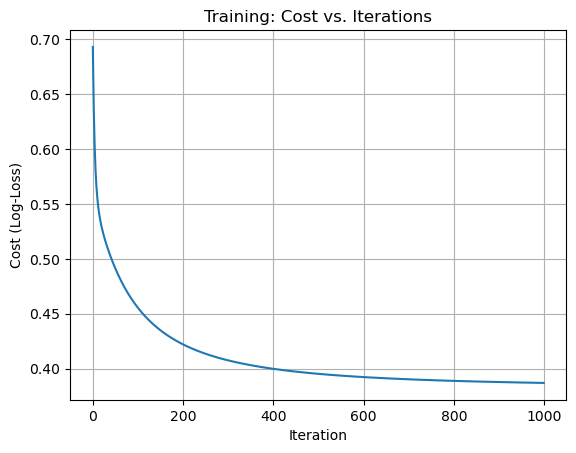

In [31]:
# Add bias column
m, n = X_train.shape
X_train = np.column_stack([np.ones(m), X_train])
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])
n_with_bias = X_train.shape[1]

# 2) Utility functions: sigmoid, loss, gradient, prediction
# --------------------------------------------------
def sigmoid(z):
    # σ(z) = 1 / (1 + e^-z)
    # TODO: Complete the sigmoid function
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w):
    # p = xσ(Xw)
    # TODO: Complete the predict probability function
    return sigmoid(X @ w)

def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    # Log-loss = - [ y log(p) + (1-y) log(1-p) ]
    # You might need to restrict the values using np.clip
    # TODO: Complete the binary cross entropy function
    y_prob = np.clip(y_prob, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))
    
def gradient(X, y_true, y_prob):
    # ∂J/∂w = (1/m) X^T (p - y)
    # TODO: Complete the gradient descent function
    m = X.shape[0]
    return (1/m) * (X.T @ (y_prob - y_true))

# 3) Initialize parameters
# --------------------------------------------------
# TODO: set the initial values for the parameters
w = np.zeros(n_with_bias)

# 4) Hyperparameters
# --------------------------------------------------
# TODO: set learning_rate and num_iterations
learning_rate = 0.1
num_iterations = 1000

print("Initial Parameters")
print("Learning rate:", learning_rate)
print("Number of Iterations:", num_iterations)
print()

# For tracking
cost_history = []


# 5) Gradient Descent loop
# --------------------------------------------------
# TODO: Forward pass: compute probabilities

for i in range(num_iterations):
    y_prob = predict_proba(X_train, w)
    
    # TODO: Compute loss (log-loss / cross-entropy)
    cost = binary_cross_entropy(y_train, y_prob)
    cost_history.append(cost)

    # TODO: Backward pass: compute gradient
    grad = gradient(X_train, y_train, y_prob)
    
    # TODO Parameter update
    w -= learning_rate * grad
        
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")

    
# 6) Final parameters
# --------------------------------------------------
print()
print("Final parameters (w):")
print(w)


# 7) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs. Iterations")
plt.grid(True)
plt.show()

Plotting cost sensitivity for parameter indices: [ 7  6 11]


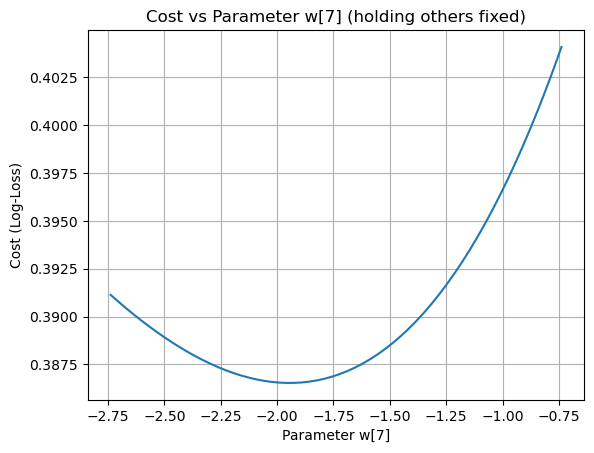

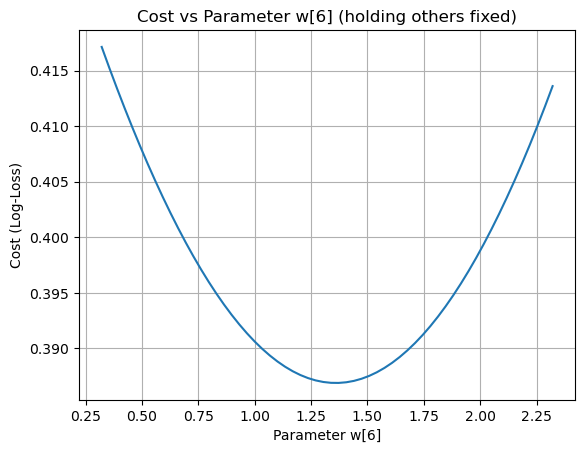

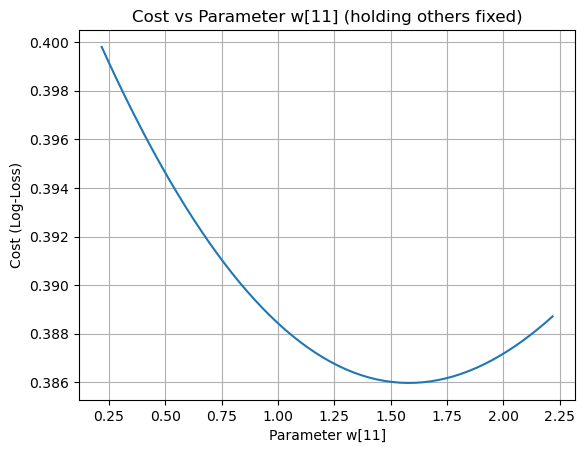

Training accuracy: 0.816492628992629
Test accuracy: 0.8188238906801781


In [32]:
# 8) Plot: Cost vs 3 of the most important parameters
# --------------------------------------------------
# Idea: pick 3 parameters (excluding bias) by magnitude after training,
# then sweep each parameter around its learned value while holding others fixed,
# and plot the (1D) cost curve for each.
#At the end of training, you have a weight vector w (parameters). You also have a 
# cost function 𝐽 ( 𝑤)
#J(w), which tells you how good or bad those weights are.

#Normally, we look at cost vs iterations (how the loss decreases over time). But sometimes it’s useful to see:
# “What happens to the cost if I wiggle just one parameter, while keeping all others fixed?”

# That’s what the sweep does.
# For each candidate value in the sweep, we create a temporary weight vector w_tmp.
# We replace the chosen parameter with val.
# Then we compute the cost 𝐽 (𝑤_tmp ) using the same dataset.
# Append that cost to a list.

#We plot:

#x-axis: the parameter’s value (from the sweep)

#y-axis: the cost computed at that parameter value

#This shows the “sensitivity curve” of the cost with respect to that parameter.

# Identify top-3 parameters by |w| (excluding bias at index 0)

param_indices = np.argsort(np.abs(w[1:]))[::-1][:3] + 1  # shift by 1 to skip bias
print("Plotting cost sensitivity for parameter indices:", param_indices)

def compute_cost_given_w(mod_w):
   # Helper to compute cost for a modified parameter vector
    y_hat_mod = predict_proba(X_train, mod_w)
    return binary_cross_entropy(y_train, y_hat_mod)

#For each chosen parameter, sweep values and compute cost
for idx in param_indices:
    center = w[idx]
    # choose a sensible sweep range; here: ±1.0 around the trained value
    sweep = np.linspace(center - 1.0, center + 1.0, 60)

    costs = []
    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))

    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"Parameter w[{idx}]")
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs Parameter w[{idx}] (holding others fixed)")
    plt.grid(True)
    plt.show()


# 9) (Optional) Inference helper
# --------------------------------------------------
def predict_label(X_new, w, threshold=0.5):
    # Returns 0/1 predictions based on threshold
    return (predict_proba(X_new, w) >= threshold).astype(int)

train_preds = predict_label(X_train, w)
test_preds = predict_label(X_test, w)
print("Training accuracy:", (train_preds == y_train).mean())
print("Test accuracy:", (test_preds == y_test).mean())

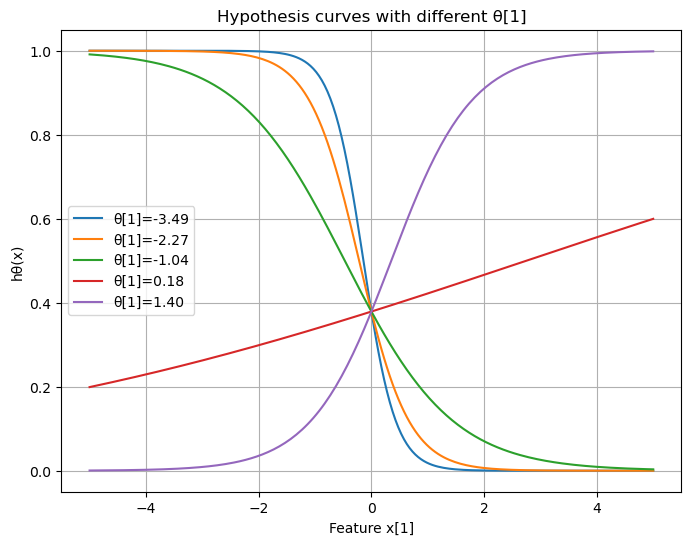

In [33]:
def plot_theta(X, w, feature_idx=1, sweep_range=(-3, 3), steps=50):

    w_base = w.copy()
    theta_values = np.linspace(w_base[feature_idx] + sweep_range[0],
                               w_base[feature_idx] + sweep_range[1], steps)
    
    x_axis = np.linspace(-5, 5, 200)
    plt.figure(figsize=(8,6))
    
    for theta in theta_values[::10]: # plot every 10th 
        w_tmp = w_base.copy()
        w_tmp[feature_idx] = theta
        y_hat = sigmoid(w_tmp[0] + theta * x_axis)  # only bias + this feature
        plt.plot(x_axis, y_hat, label=f"θ[{feature_idx}]={theta:.2f}")
    
    plt.title(f"Hypothesis curves with different θ[{feature_idx}]")
    plt.xlabel(f"Feature x[{feature_idx}]")
    plt.ylabel("hθ(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_theta(X_train, w, feature_idx=1)